# **Proyek Analisis Data: Bike Sharing Dataset**

*   Nama  : Harry Akbar Fauzan
*   Email : harryakbar470@gmail.com
*   ID Dicoding : harryakbarfauzan




# Data Understanding
data yang digunakan merupakan data air quality yang disediakan dicoding informasi data yang ada pada percobaan kali ini adalah

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## Menentukan Pertanyaan Bisnis

- faktor apa yang paling mempengaruhi jumlah peminjaman sepeda?
- jam berapa peminjaman terbanyak dan tersedikit dilakukan?


## Menyiapkan semua library yang dibutuhkan

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
drive.mount('/content/drive')
pd_day = pd.read_csv("/content/drive/MyDrive/data/BikeSharing/day.csv")
pd_hour = pd.read_csv("/content/drive/MyDrive/data/BikeSharing/hour.csv")


Mounted at /content/drive


In [4]:
pd_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
pd_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Data Bike Sharing per day

In [6]:
pd_day.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# mengecek missing value
pd_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#mengecek data duplicates
print("duplikat : ", pd_day.duplicated().sum())

duplikat :  0


In [9]:
#mengecek parameter
pd_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada keanehan atau kesalaham pada data bike sharing day disini kita bisa merubah type data dteday dari objek ke date

# Menilai data bike sharing hour

In [10]:
pd_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
# mengecek missing value
pd_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
#mengecek data duplicates
print("duplikat : ", pd_day.duplicated().sum())

duplikat :  0


In [13]:
#mengecek parameter
pd_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


sama tidak ada keanehan dan kesalahan. pada data hour pun akan dilakukan proses yang sama yaitu merubah tipe data dteday dan membuat label  total

### Cleaning Data

berdasarkan hasil assestment akan ada 1 proses pada cleaning data ini yaitu merubah tipe data dteday menjadi date. namun agar ada proses lain disini saya akan menghapus label yang tidak digunakan sesuai dengan pertayaan bisnis. label yang akan dihapus adalah windspeed hum atemp,dan temp

proses cleaning data bike sharing day

In [14]:
pd_day["dteday"] = pd.to_datetime(pd_day["dteday"])

In [15]:
pd_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
pd_day.drop(["temp", "hum", "windspeed", "atemp"], axis=1)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,364,1432,1796


In [17]:
pd_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


proses cleaning data bike sharing hour

In [18]:
pd_hour["dteday"] = pd.to_datetime(pd_hour["dteday"])
pd_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
pd_hour.drop(["temp", "hum", "windspeed", "atemp"], axis=1, inplace=True)
pd_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  casual      17379 non-null  int64         
 11  registered  17379 non-null  int64         
 12  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 1.7 MB


In [20]:
pd_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


## Exploratory Data Analysis (EDA)

sekarang kita masuk ke proses analisi langsung saja untuk pemanasan kita faktor apa yang paling mempengaruhi jumlah peminjaman disini kita membandingkan 4 faktor saja yaitu holiday, weekday, working day, dan weathersit

In [21]:
pd_day.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "std", "sum" ]
})

cnt                                         
          max   min         mean          std      sum
holiday                                               
0        8714    22  4527.104225  1929.013947  3214244
1        7403  1000  3735.000000  2103.350660    78435

In [22]:
pd_day.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean", "std","sum"]
})

cnt                                        
          max   min         mean          std     sum
weekday                                              
0        8227   605  4228.828571  1872.496629  444027
1        7525    22  4338.123810  1793.074013  455503
2        7767   683  4510.663462  1826.911642  469109
3        8173   441  4548.538462  2038.095884  473048
4        7804   431  4667.259615  1939.433317  485395
5        8362  1167  4690.288462  1874.624870  487790
6        8714   627  4550.542857  2196.693009  477807

In [23]:
pd_day.groupby(by="workingday").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

cnt                                        
             max  min         mean          std      sum
workingday                                              
0           8714  605  4330.168831  2052.141245  1000269
1           8362   22  4584.820000  1878.415583  2292410

In [24]:
pd_day.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

cnt                                        
             max  min         mean          std      sum
weathersit                                              
1           8714  431  4876.786177  1879.483989  2257952
2           8362  605  4035.862348  1809.109918   996858
3           4639   22  1803.285714  1240.284449    37869

berdasarkan analisi yang pertama dapat kita lihat faktor yang paling mempengaruhi adalah weathersit. semakit besar nilai weathersit maka semakin sedikit orang yang meminjam sepeda.

selanjutna kita analisis jam berapa peminjaman dilakukan

In [25]:
pd_hour.groupby(by="hr").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
}).sort_values(('cnt', 'mean'), ascending=False)

cnt                                    
    max min        mean         std     sum
hr                                         
17  976  15  461.452055  232.656611  336860
18  977  23  425.510989  224.639304  309772
8   839   5  359.011004  235.189285  261001
16  783  11  311.983562  148.682618  227748
19  743  11  311.523352  161.050359  226789
13  760  11  253.661180  148.107657  184919
12  776   3  253.315934  145.081134  184414
15  750   7  251.233196  144.632541  183149
14  750  12  240.949246  147.271574  175652
20  567  11  226.030220  119.670164  164550
9   426  14  219.309491   93.703458  159438
7   596   1  212.064649  161.441936  154171
11  663  10  208.143054  127.495536  151320
10  539   8  173.668501  102.205413  126257
21  584   6  172.314560   89.788893  125445
22  502   9  131.335165   69.937782   95612
23  256   2   87.831044   50.846889   63941
6   213   1   76.044138   55.084348   55132
0   283   2   53.898072   42.307910   39130
1   168   1   33.375691   33.538727   24164
2   132   1   22.869930   26.578642   16352
5    66   1   19.889819   13.200765   14261
3    79   1   11.727403   13.239190    8174
4    28   1    6.352941    4.143818    4428

berdasarkan hasil analisi diatas peminjaman biasa dilakukan pada waktu sore hari yaitu jam 17 dan 18 atau jam 5 sore dan 6 magrib. dan jumlah peminjaman paling sedikit ada pada subuh hari atau dijam 3 dan 4 pagi

sekarang sebagai bonus saya ingin melihat perkembangan jumlah peminjaman pertahunnya jadi langsung saja

In [26]:
pd_hour.groupby(by="yr").agg({
    "casual": "sum",
    "registered":"sum",
    "cnt":"sum"
})

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


ternyata hanya ada 2 tahun XD, seperti yang terlihat pada hasil diatas terjadi peningkatan jumlah peminjaman pada tahun 2011 ke 2012 jumlah peningkatan mencapai 125.513 peminjaman untuk user casual, 680.960 peminjaman user yang terdaftar. sehingga total peningkatan jumlah peminjaman sebesar 64% atau 806573 peminjaman

## Visualization & Explanatory Analysis

### Pertanyaan 1 : faktor apa yang paling mempengaruhi jumlah peminjaman sepeda?

sekarang mari kita buat visualisasi faktor apa saja yang paling mempengaruhi jumlah peminjaman sepeda. kita lihat berdasarakan rata rata saja ada 4 faktor yang kita periksa yaitu weathersit, weekday, workingday, dan holiday

yang pertama kita coba pengaruh weathersit terhadap rata rata peminjaman sepeda

In [27]:
weather_agg = pd_day.groupby(by="weathersit").agg({
    "cnt": ["mean"]
})

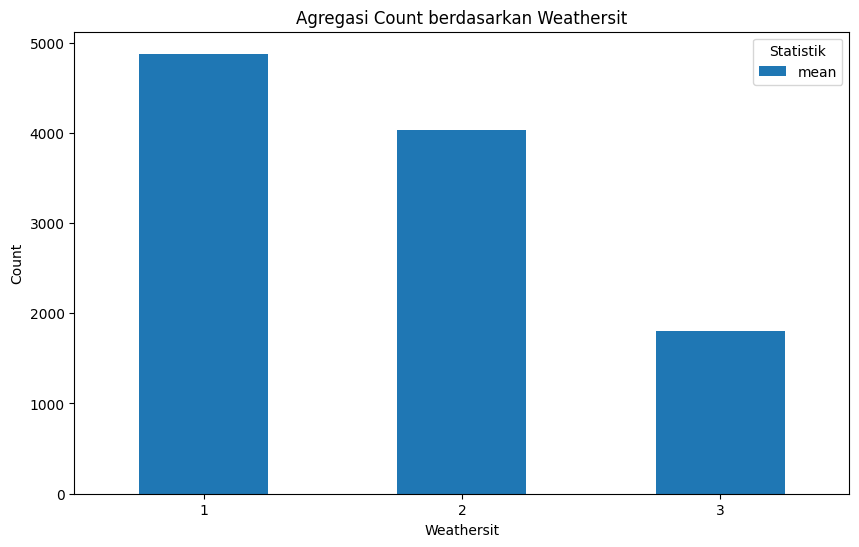

In [40]:
weather_agg.plot(kind='bar', figsize=(10, 6))

plt.title('Agregasi Count berdasarkan Weathersit')
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.legend(title='Statistik', labels=["mean"])
plt.xticks(rotation=0)
plt.show()

terlihat ada perbedaan yang signifikan jumlah peminjaman, pada tipe cuaca 1 rata rata peminjaman mencapai 5000 peminjaman, kemudian menurun pada tipe cuaca yang kedua sebesar 20% menjadi 4000 peminjaman, kemudian menurun kembali sebesar 50% pada weathersit 3, yang tadinya 4000 peminjaman menjadi hanya 2000 peminjaman saja.

kemudian sekarang kita lihat faktor holiday.

In [42]:
holiday_agg = pd_day.groupby(by="holiday").agg({
    "cnt": "mean"
})

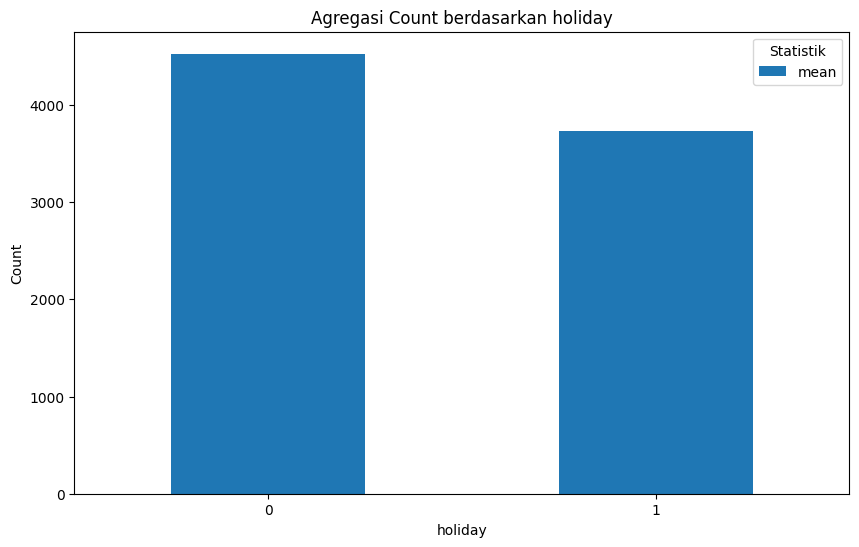

In [43]:
holiday_agg.plot(kind='bar', figsize=(10, 6))

plt.title('Agregasi Count berdasarkan holiday')
plt.xlabel('holiday')
plt.ylabel('Count')
plt.legend(title='Statistik', labels=["mean"])
plt.xticks(rotation=0)
plt.show()

terlihat faktor holiday  mempengaruhi jumlah peminjaman sepeda sebesar 20%. terjadi penurunan pada hari yang bukan holiday, yang mana ketika holiday rata rata peminjam diangka 4900 menurun pada hari yang bukan holiday menjadi 3900

kemudian dilakukan juga pada faktor weekday

In [44]:
weekday_agg = pd_day.groupby(by="weekday").agg({
    "cnt": "mean"
})

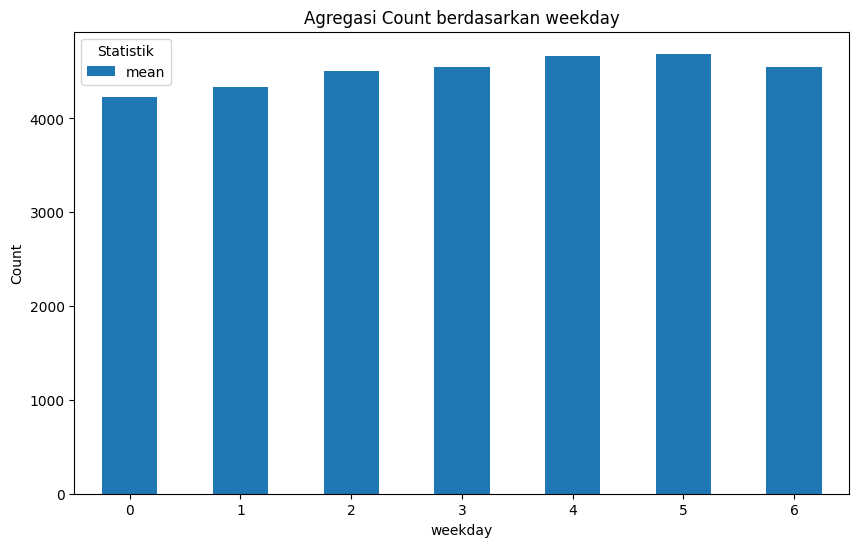

In [45]:
weekday_agg.plot(kind='bar', figsize=(10, 6))

plt.title('Agregasi Count berdasarkan weekday')
plt.xlabel('weekday')
plt.ylabel('Count')
plt.legend(title='Statistik', labels=["mean"])
plt.xticks(rotation=0)
plt.show()

pada weekday terlihat pengunjung terbanyak ada pada hari dengan label 4 atau kamis ? (tidak ada keterangan didatanya. kemudian hari dengan peminjaman tersedikit di hari dengan label 0. untuk faktor weekday sendiri tidak mempengaruhi jumlah peminjaman secara signifikan. rata rata peminjaman tiap harinya sama yaitu mencapai lebih dari 4000

terakhir kita akan melihat pengaruh workingday

In [46]:
workingday_agg = pd_day.groupby(by="workingday").agg({
    "cnt": "mean"
})

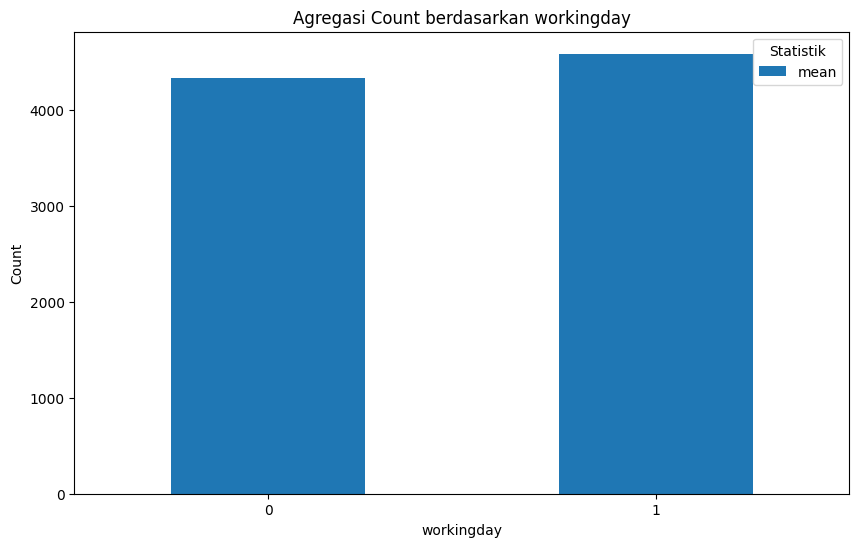

In [49]:
workingday_agg.plot(kind='bar', figsize=(10, 6))

plt.title('Agregasi Count berdasarkan workingday')
plt.xlabel('workingday')
plt.ylabel('Count')
plt.legend(title='Statistik', labels=["mean"])
plt.xticks(rotation=0)
plt.show()

terlihat workingday atau tidak jumlah peminjaman sepeda hampir sama yang artinya baik ketika kerja atau tidak banyak orang yang meminjam sepeda.

### pertanyaan 2 : jam berapa peminjaman terbanyak dan tersedikit dilakukan?

selanjutnya visualisasi pertanyaan kedua

In [52]:
hour_pd = pd_hour.groupby(by="hr").agg({
    "cnt":"mean"
})

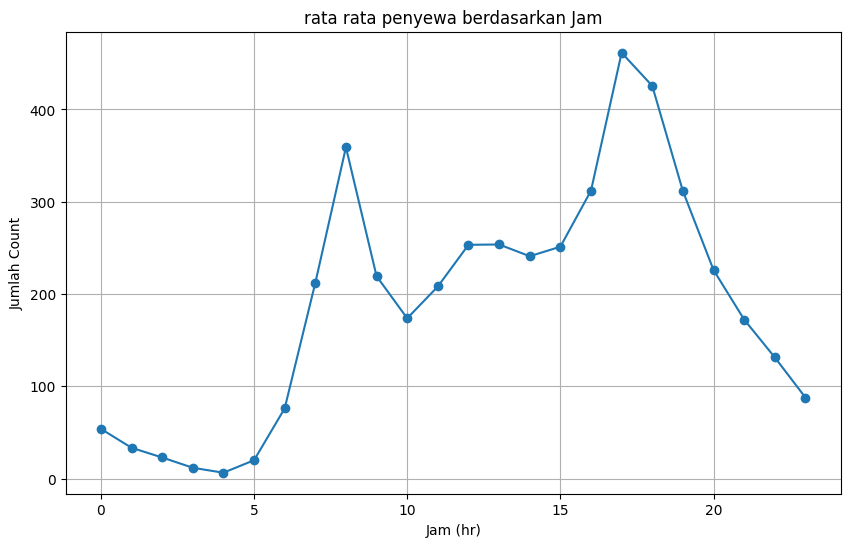

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(hour_pd.index, hour_pd['cnt'], marker='o', linestyle='-')
plt.title('rata rata penyewa berdasarkan Jam')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Count')
plt.grid(True)
plt.show()

seperti yang terlihat pada grapik, rata rata tertinggi penyewa sepeda ada di jam 17 disusul jam 18 dan jam 8, jika kita analisi lebih lanjut jam jam yang memiliki jumlah penyewa sepeda tertinggi adalah sekitaran jam berangkat kegiatan dan pulang kegiatan. kemudian rata rata terendah penyewa sepeda ada di jam 4 disusul jam 3 dan 5. dan seperti yang kita ketahui jam tersebut adalah jam dimana orang normal beristirahat dirumah.  

## Conclusion

berdasarkan hasil analisi diatas diperoleh kesimpulan sebagai berikut

kesimpulan yang pertama adalah faktor yang paling mempengaruhi jumlah peminjaman sepeda adalah jenis cuaca atau weathersit. ketika cuaca baik baik saja (1) rata rata jumlah peminjam mencapai 4900, kemudian ketika cuaca buruk seperti hujan salju, hujan, dan badai ringan (3) jumlah penyewa turun drastis menyentuh rata rata penyewa 2000 orang saja. dan sebenarnya ada cuaca tipe 4 yaitu jenis badai, kabut tebal, dan cuaca ekstrem namun pada data tidak ada informasi penyewa, ada 2 kemungkinan pertama cuaca ekstrem tidak terjadi pada rentang data diambil atau tidak ada penyewa.

kemudian kesimpulan kedua adalah jam dengan rata rata penyewa terbanyak adalah jam 18 atau jam 6 malam sedangkan jam dengan rata rata penyewa terkecil adalah jam 4 pagi.  